<a href="https://colab.research.google.com/github/Prabhukumar1234/Mathematical_models/blob/main/Jump_Diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

In [ ]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, poisson
import pandas as pd

>Get The data from yfinance

>Simulating the graphs for the observed and real time

>Simulating the graphs for future prices

In [56]:



def jd_graph(mu, lambd, sigma, J, price, T, dt,year,test_start,test_end):
    N = int(T / dt)#Number of days
    price_s= np.zeros(N+1)#initializing the Closing price of the Stock
    price_s[0] = price[0]#initial prices
    J_t = np.zeros(N+1)#Jumps
    for i in range(1, N+1):#function of jd
        dW = np.sqrt(dt) * norm.rvs()
        dN = poisson.rvs(lambd * dt)
        J_t[i] = J_t[i-1] + dN
        J_i = J(J_t[i])
        price_s[i] = price_s[i-1] * np.exp((mu - lambd*J_i - 0.5*sigma**2)*dt + sigma*dW + J_i*dN)
    
    dates = pd.date_range(start=test_start, periods=len(price), freq='B')
    plt.plot(dates,price, label="Actual")
    #dates = pd.date_range(start=test_start, periods=len(price_s), freq='B')
    #print(price)
    #print("\n\n\n")
    #print(price_s)
    plt.plot(dates,price_s[:-1], label="Estimated")

    print("Mean square error of slopes(differentiation)",np.mean(np.square(np.diff(np.array(price))-np.diff(np.array(price_s[:-1])))))
    plt.legend()
    plt.xlabel("date")
    plt.ylabel("swtock-price")
    plt.title(year)
    plt.show()


def meomoments(price,tt,dt):#Method of moments 
    delta_price = np.diff(np.log(price))#difference of stock(Change of stock inter day)
    mu_cap = np.mean(delta_price) / dt
    sigma_cap = np.std(delta_price) / np.sqrt(dt)#standard error
    lambd_cap = np.mean(delta_price**2) / np.mean(delta_price)**2 - 1#frequency of jumps based on poison distribution
    J_cap = lambda x: np.mean(np.exp(-lambd_cap*x)*delta_price) / dt#jumps based on poison distribution
    return mu_cap, lambd_cap, sigma_cap, J_cap


# training the parameters using the historical stock prices(previous year)
def train_ticker(ticker,start_date,end_date,test_start,test_end):
  stock = yf.Ticker(ticker)
  data = stock.history(period="max")
  price = data["Close"].values
  price = data.loc[start_date:end_date]["Close"].values
  T=1
  tt = len(price)
  dt = 1 / tt
  mu_cap, lambd_cap, sigma_cap, J_cap = meomoments(price, tt, dt)
  price = data.loc[test_start:test_end]["Close"].values
  tt = len(price)
  dt = 1 / tt
  jd_graph(mu_cap, lambd_cap, sigma_cap, J_cap, price, T, dt,"Based on "+start_date[:4]+"projected to "+test_start[:4]+" for "+str(tt) +" days---> "+ticker,test_start,test_end)
  print(" mu_casp:{} \n lambd_cap:{} \n sigma_casp:{} \n J_cap:{}".format(mu_cap, lambd_cap, sigma_cap, J_cap))




Mean square error of slopes(differentiation) 10.35778639645228


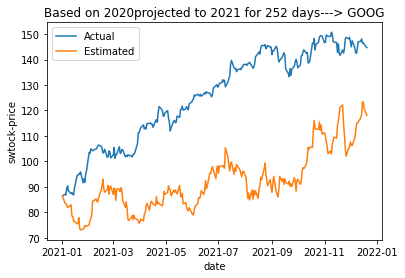

 mu_casp:0.24878366864470808 
 lambd_cap:604.4959747174807 
 sigma_casp:0.384554868408128 
 J_cap:<function meomoments.<locals>.<lambda> at 0x7f38d8ad6dc0>




Mean square error of slopes(differentiation) 0.20618669967085365


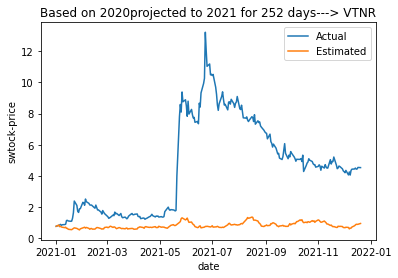

 mu_casp:-0.7673242078029332 
 lambd_cap:442.09490714836767 
 sigma_casp:1.0143232843499543 
 J_cap:<function meomoments.<locals>.<lambda> at 0x7f38d8b2ea60>




Mean square error of slopes(differentiation) 82.51133368781382


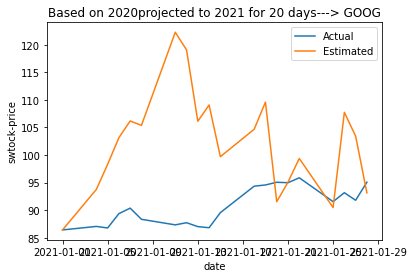

 mu_casp:0.24878366864470808 
 lambd_cap:604.4959747174807 
 sigma_casp:0.384554868408128 
 J_cap:<function meomoments.<locals>.<lambda> at 0x7f38d894e280>


In [57]:
price_sim=train_ticker('GOOG','2020-01-01','2020-12-31','2021-01-01','2021-12-31')
print("\n\n\n")
price_sim=train_ticker('VTNR','2020-01-01','2020-12-31','2021-01-01','2021-12-31')#small cap
print("\n\n\n")
price_sim=train_ticker('GOOG','2020-01-01','2020-12-31','2021-01-01','2021-02-01')
